In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms, datasets

from torchinfo import summary

import os

import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    transforms.RandomRotation(degrees=15)
])

In [4]:
train_data = datasets.MNIST(root="../data/",
                            train=True,
                            download=True,
                            transform=data_transform,
                            target_transform=None)

test_data = datasets.MNIST(root="../data/",
                           train=False,
                           download=True,
                           transform=data_transform)

train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ../data/
     Split: Train
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../data/
     Split: Test
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
            ))

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
len(train_data[0])

2

In [8]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [9]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [11]:
os.cpu_count()

8

In [12]:
batch_size = 32
num_workers = os.cpu_count()


In [13]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size,
                              num_workers=num_workers,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batch_size,
                             num_workers=num_workers,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x18c5077ce50>,
 <torch.utils.data.dataloader.DataLoader at 0x18c5077ceb0>)

In [14]:
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [15]:
img, label = next(iter(train_dataloader))

In [16]:
img, label

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [17]:
len(img)

32

In [18]:
img[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [19]:
img[0].shape

torch.Size([1, 28, 28])

In [20]:
img[0].permute(1,2,0)

tensor([[[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [

Text(0.5, 1.0, '0 - zero')

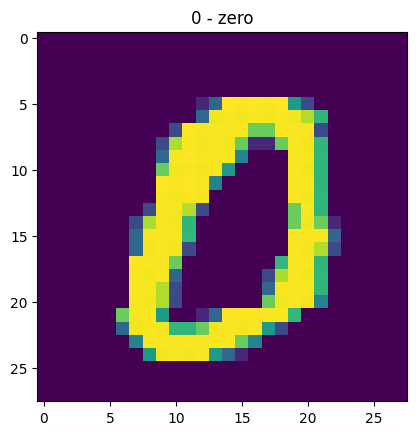

In [21]:
plt.imshow(img[0].permute(1,2,0))
plt.title(class_names[label[0].item()])

In [22]:
label[0]

tensor(0)

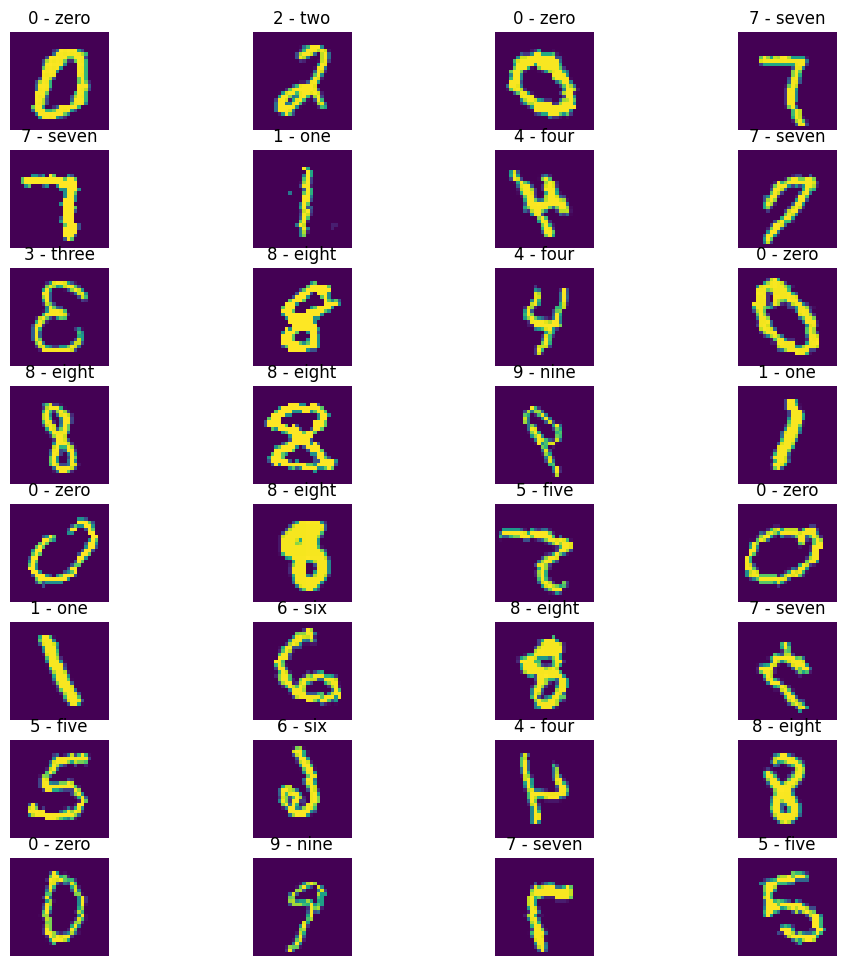

In [23]:
torch.manual_seed(42)

fig = plt.figure(figsize=(12, 12))
rows, cols = 8, 4
for x in range(1, rows * cols +1):
    
    fig.add_subplot(rows, cols, x)
    plt.imshow(img[x-1].permute(1, 2, 0))
    plt.title(class_names[label[x-1]])
    plt.axis(False)

Text(0.5, 1.0, '2 - two')

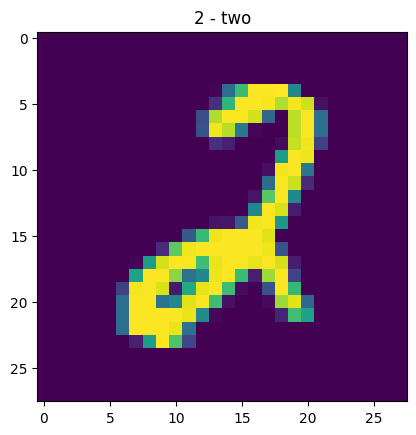

In [24]:
plt.imshow(img[1].permute(1,2,0))
plt.title(class_names[label[1]])

In [25]:
class handwrittenv0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.conv2d_1 = nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1)
        self.conv2d_2 = nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1)
        self.maxpool_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(p = 0.2)
        self.linear_1 = nn.Linear(in_features=hidden_units*(7*7), out_features=output_shape)

    def forward(self, x):
        z = self.conv2d_1(x)
        z = self.relu(z)
        z = self.maxpool_1(z)
        z = self.dropout(z)
        z = self.conv2d_2(z)
        z = self.relu(z)
        z = self.maxpool_1(z)
        z = self.flatten(z)
        z = self.linear_1(z)

        return z
        

In [26]:
model_0 = handwrittenv0(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)
model_0

handwrittenv0(
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv2d_1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear_1): Linear(in_features=490, out_features=10, bias=True)
)

In [27]:
summary(model_0, input_size=[32, 1, 28, 28])

Layer (type:depth-idx)                   Output Shape              Param #
handwrittenv0                            [32, 10]                  --
├─Conv2d: 1-1                            [32, 10, 28, 28]          100
├─ReLU: 1-2                              [32, 10, 28, 28]          --
├─MaxPool2d: 1-3                         [32, 10, 14, 14]          --
├─Dropout: 1-4                           [32, 10, 14, 14]          --
├─Conv2d: 1-5                            [32, 10, 14, 14]          910
├─ReLU: 1-6                              [32, 10, 14, 14]          --
├─MaxPool2d: 1-7                         [32, 10, 7, 7]            --
├─Flatten: 1-8                           [32, 490]                 --
├─Linear: 1-9                            [32, 10]                  4,910
Total params: 5,920
Trainable params: 5,920
Non-trainable params: 0
Total mult-adds (M): 8.37
Input size (MB): 0.10
Forward/backward pass size (MB): 2.51
Params size (MB): 0.02
Estimated Total Size (MB): 2.64

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [29]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [30]:
torch.manual_seed(42)

epochs = 3

for epoch in range(epochs):

    # training

    train_loss = 0
    train_acc = 0

    for batch, (X, y) in enumerate(train_dataloader):

        X = X.to(device)
        y = y.to(device)

        model_0.train()

        train_pred = model_0(X)

        loss = loss_fn(train_pred, y)
        train_loss += loss

        acc = accuracy_fn(y_true = y,
                          y_pred = train_pred.argmax(dim=1))
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # testing

    test_loss = 0
    test_acc = 0

    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:

            X = X.to(device)
            y = y.to(device)

            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss

            acc = accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
            test_acc += acc

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}% | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")


Train loss: 0.51630 | Train accuracy: 83.22% | Test loss: 0.28290 | Test accuracy: 90.58%

Train loss: 0.30314 | Train accuracy: 89.95% | Test loss: 0.22357 | Test accuracy: 92.37%

Train loss: 0.25594 | Train accuracy: 91.54% | Test loss: 0.20602 | Test accuracy: 93.24%


In [31]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):

    train_loss = 0
    train_acc = 0

    for batch, (X, y) in enumerate(dataloader):

        X = X.to(device)
        y = y.to(device)

        model.train()

        train_pred = model(X)

        loss = loss_fn(train_pred, y)
        train_loss += loss

        acc = accuracy_fn(y_true = y,
                          y_pred = train_pred.argmax(dim=1))
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc

In [32]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,):

    test_loss = 0
    test_acc = 0

    model_0.eval()

    with torch.inference_mode():
        for X, y in dataloader:

            X = X.to(device)
            y = y.to(device)

            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss

            acc = accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
            test_acc += acc

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    return test_loss, test_acc

In [33]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int):
        
        
        results = {
               "train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
               }
        
        
        for epoch in range(epochs):
             train_loss, train_acc = train_step(model= model,
                                       dataloader= train_dataloader,
                                       loss_fn= loss_fn,
                                       optimizer= optimizer)
             
             test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
             
             
             print(f"epoch: {epoch+1} | train loss: {train_loss:.5f} | train_acc: {train_acc:.5f}% | test loss: {test_loss:.5f} | test_acc: {test_acc:.5f}%")
             
             results["train_loss"].append(train_loss)
             results["train_acc"].append(train_acc)
             results["test_loss"].append(test_loss)
             results["test_acc"].append(test_acc)
             
        return results

In [34]:
model_00 = handwrittenv0(input_shape=1,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

model_00

handwrittenv0(
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv2d_1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear_1): Linear(in_features=490, out_features=10, bias=True)
)

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_00.parameters(),
                            lr=0.1)

In [36]:
train(model=model_00,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      epochs=3)

epoch: 1 | train loss: 0.54209 | train_acc: 82.06833% | test loss: 0.30369 | test_acc: 89.74641%
epoch: 2 | train loss: 0.29122 | train_acc: 90.53333% | test loss: 0.24221 | test_acc: 91.98283%
epoch: 3 | train loss: 0.25277 | train_acc: 91.64000% | test loss: 0.22841 | test_acc: 92.31230%


{'train_loss': [tensor(0.5421, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.2912, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.2528, device='cuda:0', grad_fn=<DivBackward0>)],
 'train_acc': [82.06833333333333, 90.53333333333333, 91.64],
 'test_loss': [tensor(0.3037, device='cuda:0'),
  tensor(0.2422, device='cuda:0'),
  tensor(0.2284, device='cuda:0')],
 'test_acc': [89.74640575079871, 91.98282747603834, 92.31230031948881]}

In [37]:
model_0.parameters()

<generator object Module.parameters at 0x0000018C53B34120>

In [38]:
model_00.parameters()

<generator object Module.parameters at 0x0000018C53B34740>

In [39]:
model_0.parameters

<bound method Module.parameters of handwrittenv0(
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv2d_1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear_1): Linear(in_features=490, out_features=10, bias=True)
)>

In [40]:
class handwrittenv1(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
        super().__init__()

        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.conv2d_1 = nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1)
        self.conv2d_2 = nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1)
        self.maxpool_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(p = 0.2)
        self.linear_1 = nn.Linear(in_features=hidden_units*(7*7), out_features=output_shape)

    def forward(self, x):
        z = self.conv2d_1(x)
        z = self.relu(z)
        z = self.maxpool_1(z)
        z = self.dropout(z)
        z = self.conv2d_2(z)
        z = self.relu(z)
        z = self.maxpool_1(z)
        z = self.conv2d_2(z)
        z = self.relu(z)
        z = self.flatten(z)
        z = self.linear_1(z)

        return z

In [41]:
model_1 = handwrittenv1(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)
model_1

handwrittenv1(
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv2d_1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear_1): Linear(in_features=490, out_features=10, bias=True)
)

In [42]:
summary(model_1, [32, 1, 28, 28])

Layer (type:depth-idx)                   Output Shape              Param #
handwrittenv1                            [32, 10]                  --
├─Conv2d: 1-1                            [32, 10, 28, 28]          100
├─ReLU: 1-2                              [32, 10, 28, 28]          --
├─MaxPool2d: 1-3                         [32, 10, 14, 14]          --
├─Dropout: 1-4                           [32, 10, 14, 14]          --
├─Conv2d: 1-5                            [32, 10, 14, 14]          910
├─ReLU: 1-6                              [32, 10, 14, 14]          --
├─MaxPool2d: 1-7                         [32, 10, 7, 7]            --
├─Conv2d: 1-8                            [32, 10, 7, 7]            (recursive)
├─ReLU: 1-9                              [32, 10, 7, 7]            --
├─Flatten: 1-10                          [32, 490]                 --
├─Linear: 1-11                           [32, 10]                  4,910
Total params: 5,920
Trainable params: 5,920
Non-trainable params: 0
Tot

In [43]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [44]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [46]:
def train_step(model:nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:nn.Module,
               optimizer:torch.optim.Optimizer):
    
    train_loss = 0
    train_acc = 0
    
    for batch, (X, y) in enumerate(dataloader):

        X = X.to(device)
        y = y.to(device)

        model.train()

        train_pred = model(X)

        loss = loss_fn(train_pred, y)
        train_loss += loss

        acc = accuracy_fn(y_true=y,
                          y_pred=train_pred.argmax(dim=1))
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc

In [47]:
def test_step(model:nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:nn.Module):
    
    test_loss = 0
    test_acc = 0

    model.eval()

    with torch.inference_mode():
        for X, y in dataloader:
            
            X = X.to(device)
            y = y.to(device)
            
            test_pred = model(X)
            
            loss = loss_fn(test_pred, y)
            test_loss += loss
            
            acc = accuracy_fn(y_true=y,
                          y_pred=test_pred.argmax(dim=1))
            test_acc += acc

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    return test_loss, test_acc

    

In [48]:
def train(model:nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn:nn.Module,
          optimizer:torch.optim.Optimizer,
          epochs: int):
    
    results = {
        "train_loss":[],
        "train_acc":[],
        "test_loss":[],
        "test_acc":[]
    }
    
    for epoch in range(epochs):

        train_loss, train_loss = train_step(model=model,
                                            dataloader=train_dataloader,
                                            loss_fn=loss_fn,
                                            optimizer=optimizer)
        
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
        
        print(f"epoch: {epoch+1} | train loss: {train_loss:.5f} | train_acc: {train_acc:.5f}% | test loss: {test_loss:.5f} | test_acc: {test_acc:.5f}%")

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results


In [49]:
train(model=model_1,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      epochs=3)

epoch: 1 | train loss: 83.07833 | train_acc: 91.54000% | test loss: 0.25494 | test_acc: 92.07268%
epoch: 2 | train loss: 91.76333 | train_acc: 91.54000% | test loss: 0.18246 | test_acc: 94.18930%
epoch: 3 | train loss: 93.00167 | train_acc: 91.54000% | test loss: 0.17308 | test_acc: 94.40895%


{'train_loss': [83.07833333333333, 91.76333333333334, 93.00166666666667],
 'train_acc': [91.54, 91.54, 91.54],
 'test_loss': [tensor(0.2549, device='cuda:0'),
  tensor(0.1825, device='cuda:0'),
  tensor(0.1731, device='cuda:0')],
 'test_acc': [92.0726837060703, 94.18929712460064, 94.40894568690096]}